In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

In [8]:
class ForthAgentModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(5,32,9,1,3) # 15 x 15 x 32
        self.linear1 = nn.Linear(7200,7200)
        self.linear2 = nn.Linear(7200,1024)
        self.linear3= nn.Linear(1024,6)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.reshape(-1,7200)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [9]:
import torch.optim as optim
model = ForthAgentModel()
print(sum(p.numel() for p in model.parameters()))
device = "cpu"
model.to(device)
print(list(model.parameters()))
feat = torch.rand((1,5,17,17),dtype=torch.float32,device=device)

59240166
[Parameter containing:
tensor([[[[ 4.1778e-02,  1.3049e-02, -1.3310e-02,  ..., -4.5893e-02,
            4.7095e-02, -2.1182e-02],
          [-2.1490e-03,  4.2690e-02,  4.8187e-02,  ..., -4.4465e-03,
           -2.2765e-03, -2.5443e-02],
          [ 6.0019e-03, -1.8102e-02,  2.7744e-02,  ...,  4.1875e-02,
            3.9311e-02,  4.4707e-02],
          ...,
          [ 1.0845e-02,  2.2307e-02,  2.8832e-03,  ...,  4.7755e-02,
            5.4323e-04,  2.0887e-02],
          [ 3.0585e-02, -2.3166e-02,  6.7147e-03,  ..., -8.2225e-03,
            1.6066e-02,  4.5255e-02],
          [-1.8104e-02, -4.5032e-02,  1.2208e-02,  ...,  1.2764e-02,
           -4.0594e-02,  2.3506e-04]],

         [[-3.2607e-02, -2.8069e-02, -4.1137e-02,  ...,  1.8418e-03,
           -3.7653e-02,  8.1310e-03],
          [ 1.5066e-02, -3.6664e-02,  3.3113e-02,  ..., -2.1767e-02,
            1.0334e-02, -4.7515e-02],
          [ 3.5411e-02, -4.0910e-02,  2.8679e-02,  ...,  3.6603e-02,
           -1.5826e-02,  1

In [10]:
%%timeit
res = model.forward(feat)
#torch.cuda.synchronize()
#print(res)


8.61 ms ± 356 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


cuda:
res = model.forward(torch.rand((100,4,17,17),dtype=torch.float32,device=device))
1.28 ms ± 14 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1000:
9.05 ms ± 39.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10k:
87.7 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
cpu:
27.5 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000:
235 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10k:
2.39 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [11]:
torch.save(model.state_dict(),"model.pth")

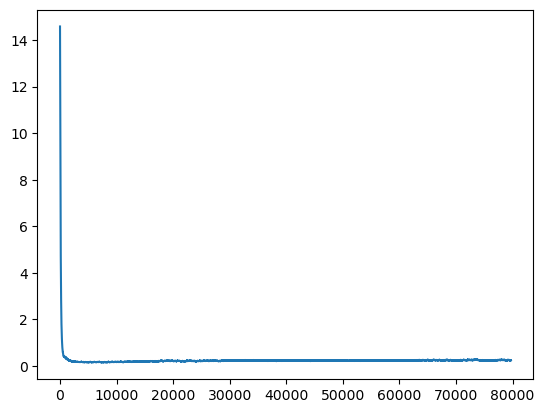

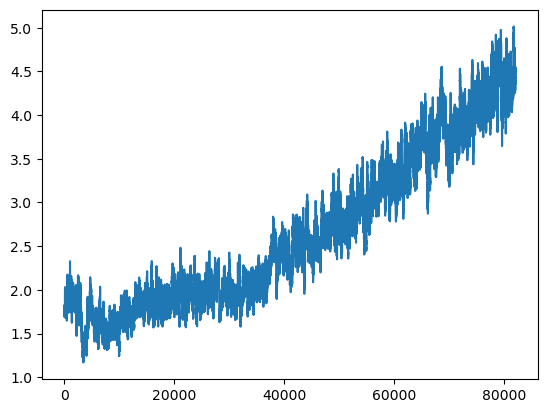

In [14]:
# analyze the loss
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
from typing import List


def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

import matplotlib.pyplot as plt
import numpy as np
loss = np.load("2024.09.21-05.55.38_loss_history.npy")
plt.figure()
#plt.yscale("log")
plt.plot(smooth(loss,0.99))
plt.show()
loss = np.load("2024.09.21-05.55.38_score_history.npy")
plt.figure()
#plt.yscale("log")
plt.plot(smooth(loss,0.99)[600:])

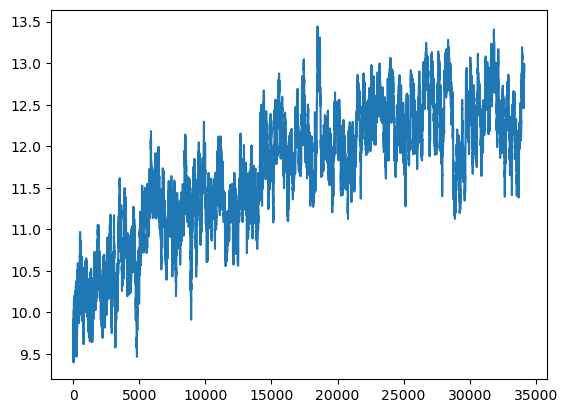

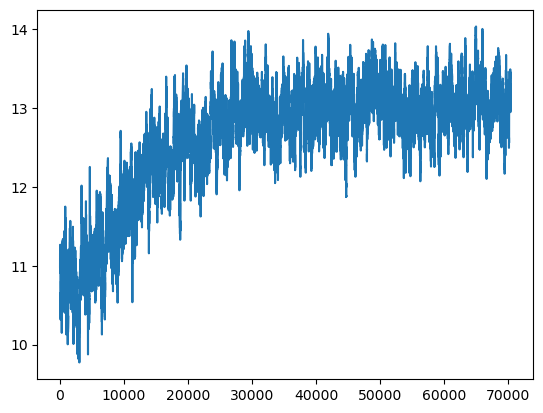

In [25]:

# analyze the loss
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
from typing import List


def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

import matplotlib.pyplot as plt
import numpy as np
loss = np.load("2024.09.19-02.24.07/2024.09.19-02.24.07_score_history.npy")
plt.figure()
#plt.yscale("log")
plt.plot(smooth(loss,0.99)[60000:])
plt.show() # old

loss = np.load("./2024.09.19-21.23.09_score_history.npy")
plt.figure()
#plt.yscale("log")
plt.plot(smooth(loss,0.99)[1000:])
plt.show() # old

In [2]:
# performance test on prioritized exp. replay
import numpy as np
errors = np.random.random(450_000)


In [8]:
%%timeit
prios = (errors + 1e-4) ** 0.5
prios = prios / prios.sum()
a = np.random.choice(450_000,1200,p=prios)
print(a[0])
print(errors.max())


166899
0.9999915605951067
187156
0.9999915605951067
228778
0.9999915605951067
231644
0.9999915605951067
426854
0.9999915605951067
422533
0.9999915605951067
47787
0.9999915605951067
391687
0.9999915605951067
309255
0.9999915605951067
93096
0.9999915605951067
190333
0.9999915605951067
143227
0.9999915605951067
408277
0.9999915605951067
447762
0.9999915605951067
167499
0.9999915605951067
110578
0.9999915605951067
28082
0.9999915605951067
154237
0.9999915605951067
55019
0.9999915605951067
348439
0.9999915605951067
276237
0.9999915605951067
110113
0.9999915605951067
154466
0.9999915605951067
329496
0.9999915605951067
123986
0.9999915605951067
179679
0.9999915605951067
5115
0.9999915605951067
187034
0.9999915605951067
361229
0.9999915605951067
278429
0.9999915605951067
13065
0.9999915605951067
160619
0.9999915605951067
26951
0.9999915605951067
390946
0.9999915605951067
137143
0.9999915605951067
331647
0.9999915605951067
328668
0.9999915605951067
408346
0.9999915605951067
26791
0.999991560595

In [ ]:
class SecondAgentModel(nn.Module):
    active_indices: np.ndarray[int]

    def __init__(self, input_size, output_size: int = 6, p1=0.3, p2=0.3, p_lin=0.3):
        super().__init__()
        self.conv1 = nn.Conv2d(4,64,5,1,"same") # 17x17
        self.pool1 = nn.MaxPool2d(2,2,1) # 8x8
        self.conv2 = nn.Conv2d(64,128,3,1,0) # # 6x6
        self.pool2 = nn.MaxPool2d(2,2,0)  
        self.drop_layer1 = nn.Dropout(p=p1)
        self.drop_layer2 = nn.Dropout(p=p2)
        self.drop_layer_lin = nn.Dropout(p=p_lin)
        self.linear1 = nn.Linear(1152,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,128)
        self.linear5 = nn.Linear(128,64)
        self.linear6 = nn.Linear(64,32)
        self.linear7 = nn.Linear(32,16)
        self.linear8= nn.Linear(16,6)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x= self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        print(x.shape)
        x = x.reshape(-1,1152)
        x = (F.relu(self.linear1(x)))
        x = (F.relu(self.linear2(x)))
        x = (F.relu(self.linear3(x)))
        x = (F.relu(self.linear4(x)))
        x = (F.relu(self.linear5(x)))
        x = (F.relu(self.linear6(x)))
        x = (F.relu(self.linear7(x)))
        x = self.linear8(x)
        return x


In [44]:
def state_to_features_4(game_state: dict | None = None) -> tuple[np.array,bool,bool,bool]:
    """
    *This is not a required function, but an idea to structure your code.*

    Converts the game state to the input of your model, i.e.
    a feature vector.

    You can find out about the state of the game environment via game_state,
    which is a dictionary. Consult 'get_state_for_agent' in environment.py to see
    what it contains.

    :param game_state:  A dictionary describing the current game board.

    :return: np.array (length: 176 *2 + 12 + 8 = 372)
    """
    if game_state is None:
        return None
    x, y = game_state["self"][3]
    transpose=False
    x_flip = False
    y_flip = False

    flip_dims = []
    result = np.zeros((5,17,17),dtype=np.float32)
    for xybomb in game_state["bombs"]:
        # tuple unpacking
        xy, bomb_timer = xybomb
        result[2][xy] = bomb_timer + 1.

    #coins = np.zeros((17, 17),dtype=np.float32)
    for coin_cords in game_state["coins"]:
        result[3][coin_cords] = 1.

    result[4][game_state["self"][3]] = 4 + 1 * game_state["self"][2] # actually use the value

    # it does not matter if the agents are in different orders for each step,
    # as we do not distinguish between them.
    for agent in game_state["others"]:
        result[4][agent[3]] = -4   - (1* agent[2])
    #now apply flips:
    if x > 8:
        flip_dims.append(0)
        x_flip = True
        x = 16 - x
    if y > 8:
        flip_dims.append(1)
        y_flip = True
        y = 16 - y
    if y > x:
        transpose = True
        result[0]=np.flip(game_state["field"],flip_dims).transpose()
        result[1]=np.flip(game_state["explosion_map"],flip_dims).transpose()
        result[2]=np.flip(result[2],flip_dims).transpose()
        result[3]=np.flip(result[3],flip_dims).transpose()
        result[4]=np.flip(result[4],flip_dims).transpose()
    else:
        result[0]=np.flip(game_state["field"],flip_dims)
        result[1]=np.flip(game_state["explosion_map"],flip_dims)
        result[2]=np.flip(result[2],flip_dims)
        result[3]=np.flip(result[3],flip_dims)
        result[4]=np.flip(result[4],flip_dims)

    stacked_channels = torch.from_numpy(result).to(dtype=torch.float32, device=device)
    return (stacked_channels,x_flip,y_flip,transpose)

In [10]:
def state_to_features_3(game_state: dict | None = None) -> tuple[np.array,bool,bool,bool]:
    """
    *This is not a required function, but an idea to structure your code.*

    Converts the game state to the input of your model, i.e.
    a feature vector.

    You can find out about the state of the game environment via game_state,
    which is a dictionary. Consult 'get_state_for_agent' in environment.py to see
    what it contains.

    :param game_state:  A dictionary describing the current game board.

    :return: np.array (length: 176 *2 + 12 + 8 = 372)
    """

    # mutate the state so that the agent will always have x,y <= 8, (is in the top left corner)
    # TODO: in the future, maybe aditionally ensure that x>=y, to exploit even more symetry.

    x, y = game_state["self"][3]
    transpose=False
    x_flip = False
    y_flip = False
    # these values get checked later

    # This is the dict before the game begins and after it ends
    if game_state is None:
        return None

    # For example, you could construct several channels of equal shape, ...

    # field and explosion are numpy, others are torch
    field: np.ndarray = game_state["field"]  # TODO: check if modifying this is allowed or copy is needed
    coins = torch.full((17, 17), 0)
    for coin_cords in game_state["coins"]:
        coins[coin_cords] = 1

    explosion_copy: np.ndarray = game_state["explosion_map"]

    bombs = torch.full((17, 17), 0)
    for xybomb in game_state["bombs"]:
        # tuple unpacking
        xy, bomb_timer = xybomb
        bombs[xy] = bomb_timer + 1

    # now pass position of each agent (we, enemy 1, 2,3)
    #agent_positions = torch.full((17, 17), 0)
    # our agent:
    # 5 if can place a bomb, 1 if not
    our_agent_encode = 3+ 2 * game_state["self"][2] # 1 if bomb not possible, 5 if possible
    field[game_state["self"][3]] = our_agent_encode # actually use the value

    # it does not matter if the agents are in different orders for each step,
    # as we do not distinguish between them.
    for agent in game_state["others"]:
        field[agent[3]] = -3   - (2 * agent[2])

    #now apply flips:
    if x > 8:
        x_flip = True
        x = 16 - x
        field = np.flipud(field)
        explosion_copy = np.flipud(explosion_copy)
        coins= torch.flipud(coins)
        bombs=torch.flipud(bombs)

    if y > 8:
        y_flip = True
        y = 16 - y
        field = np.fliplr(field)
        explosion_copy = np.fliplr(explosion_copy)
        coins = torch.fliplr(coins)
        bombs = torch.fliplr(bombs)
    
    if y > x:
        transpose = True
        field = field.T
        explosion_copy = explosion_copy.T
        coins = coins.T
        bombs = bombs.T

    channels = [
        torch.tensor(field.copy(), dtype=torch.float32), # contains, walls, crates, spaces, players
        coins,
        torch.tensor(explosion_copy.copy()),
        bombs,
    ]

    # concatenate them as a feature tensor (they must have the same shape), ...
    stacked_channels = torch.stack(channels).to(dtype=torch.float32, device=device)
    # and return them as a vector
    return (stacked_channels,x_flip,y_flip,transpose)


In [35]:
gs = {
    "round": 1,
    "step": 7,
    "field": np.array(
        [
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [-1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, -1],
            [-1, 0, -1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, -1],
            [-1, 1, -1, 1, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 1, -1],
            [-1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 0, -1, 1, -1],
            [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1],
            [-1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 1, -1, 1, -1],
            [-1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, -1],
            [-1, 0, -1, 0, -1, 0, -1, 1, -1, 1, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, -1],
            [-1, 0, -1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, -1],
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        ]
    ),
    "self": ("rule_based_agent_0", 0, False, (2, 15)),
    "others": [
        ("rule_based_agent_1", 0, False, (2, 1)),
        ("rule_based_agent_2", 0, False, (15, 4)),
        ("rule_based_agent_3", 0, False, (15, 14)),
    ],
    "bombs": [((1, 3), 0)],
    "coins": [(3,4)], # this is an edit, idk if possible
    "user_input": None,
    "explosion_map": np.array(
        [
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        ]
    ),
}


In [39]:
%%timeit
feat = state_to_features_3(gs)

79.1 μs ± 495 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [40]:
%%timeit
feat = state_to_features_4(gs)

53.4 μs ± 2.1 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [50]:
%%timeit
feat = state_to_features_4(gs)

55.1 μs ± 773 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
